<img src="/content/apple.jpg" alt="drawing" width="25%"/>

# Carregamento dos Dados

In [ ]:
import pandas as pd
df = pd.read_csv("/content/sample_data/AAPL.csv")

df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
748,2023-11-06,176.380005,179.429993,176.210007,179.229996,178.994186,63841300
749,2023-11-07,179.179993,182.440002,178.970001,181.820007,181.580780,70530000
750,2023-11-08,182.350006,183.449997,181.589996,182.889999,182.649368,49340300
751,2023-11-09,182.960007,184.119995,181.809998,182.410004,182.169998,53763500
752,2023-11-10,183.970001,186.570007,183.529999,186.399994,186.399994,66133400


# Tem linha do dataframe com dados faltando?

In [ ]:
df[df.isna().any(axis=1)] #verifica qual linha é

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
len(df)

753

In [ ]:
df = df.dropna()

len(df)

753

In [ ]:
prices = df['Close']

# Visualização dos Dados

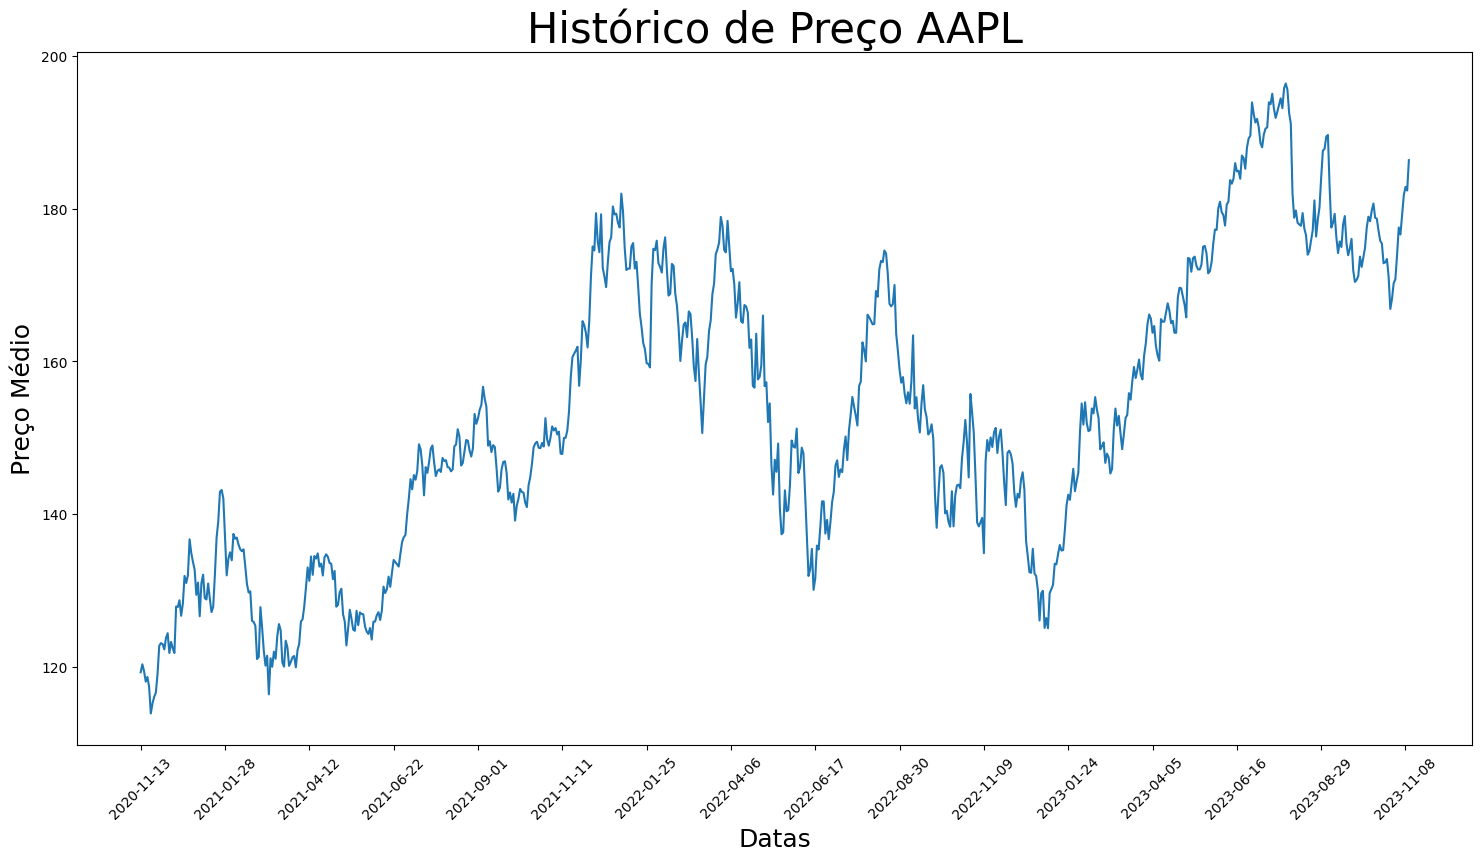

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(df['Close'])
plt.xticks(range(0,df.shape[0],50), df['Date'].loc[::50], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Médio', fontsize=18)
plt.title("Histórico de Preço AAPL", fontsize=30)
plt.show()

In [ ]:
days_time_step = 30

# Separação Teste e Treino

In [ ]:
import numpy as np
training_size = int(len(prices) * 0.95)
test_size = len(prices) - training_size
train_data, input_data = np.array(prices[0:training_size]), np.array(prices[training_size - days_time_step:])
test_data = np.array(prices[training_size:])

train_data.shape, test_data.shape

((715,), (38,))

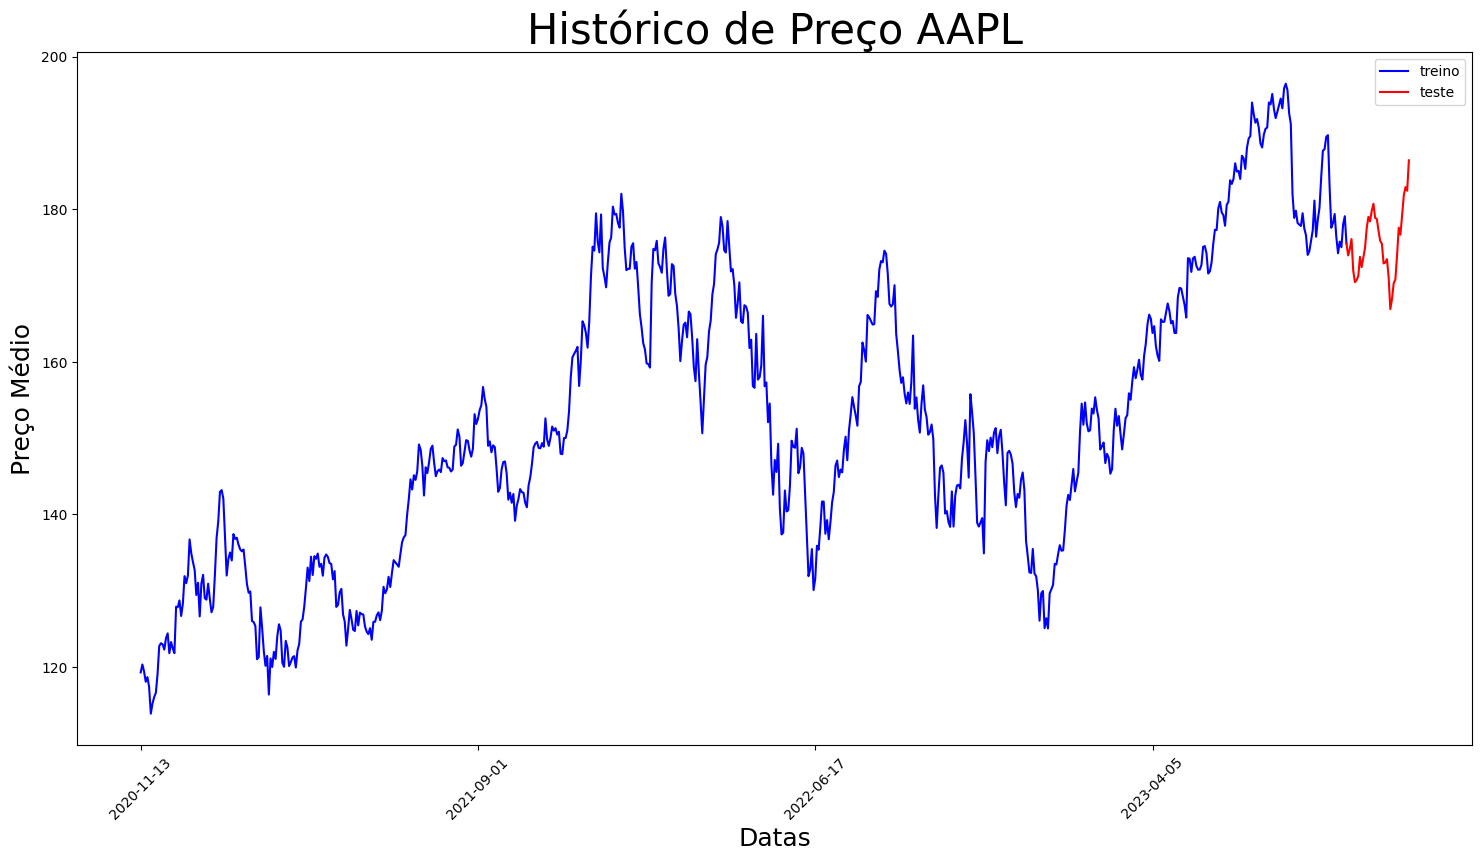

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(df['Close'].loc[0:train_data.shape[0]], color = 'blue', label = 'treino')
plt.plot(df['Close'].loc[train_data.shape[0]:], color = 'red', label = 'teste')
plt.xticks(range(0,df.shape[0],200), df['Date'].loc[::200], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Médio', fontsize=18)
plt.title("Histórico de Preço AAPL", fontsize=30)
plt.legend()
plt.show()

# Normalização dos Dados

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_data_norm = scaler.fit_transform(np.array(train_data).reshape(-1,1))
test_data_norm = scaler.transform(np.array(input_data).reshape(-1,1))
val_data_norm = scaler.transform(np.array(test_data).reshape(-1,1))


In [ ]:
train_data_norm

array([[0.06549642],
       [0.07808723],
       [0.06707023],
       [0.05060534],
       [0.05799033],
       [0.04225179],
       [0.        ],
       [0.01598063],
       [0.02639226],
       [0.03317189],
       [0.06295406],
       [0.10738503],
       [0.11174339],
       [0.11004848],
       [0.10169494],
       [0.11985475],
       [0.12748183],
       [0.09600486],
       [0.11368039],
       [0.10363204],
       [0.09600486],
       [0.16985471],
       [0.16900727],
       [0.17978207],
       [0.15508482],
       [0.17409199],
       [0.21828096],
       [0.20714297],
       [0.2193705 ],
       [0.27651337],
       [0.25447939],
       [0.24055694],
       [0.22808722],
       [0.1883778 ],
       [0.20774815],
       [0.15435836],
       [0.2066586 ],
       [0.22033905],
       [0.18317189],
       [0.1809928 ],
       [0.20629541],
       [0.18232453],
       [0.1608959 ],
       [0.16924945],
       [0.22009687],
       [0.27869246],
       [0.30532699],
       [0.351

# Pré-processamento (Gerando X e y)

In [ ]:
#treino
X_train, y_train = [], []
for i in range(days_time_step, len(train_data)):
    X_train.append(train_data_norm[i-days_time_step:i])
    y_train.append(train_data_norm[i])

#teste
X_test = []
for i in range(days_time_step, days_time_step + len(test_data)):
    X_test.append(test_data_norm[i-days_time_step:i])

#val
X_val, y_val = [], []
for i in range(days_time_step, len(test_data)):
    X_val.append(val_data_norm[i-days_time_step:i])
    y_val.append(val_data_norm[i])

#converter tudo pra matriz numpy
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

X_test.shape

(38, 30, 1)

# Treinamento de Rede Neural

In [ ]:
import tensorflow as tf

tf.__version__

'2.14.0'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(days_time_step, 1)))
#model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=False, input_shape=(days_time_step, 1)))
#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121301 (473.83 KB)
Trainable params: 121301 (473.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
h = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=30, batch_size=32)

Epoch 1/30
22/22 [==============================] - 6s 94ms/step - loss: 0.0391 - val_loss: 0.0025
Epoch 2/30
22/22 [==============================] - 2s 82ms/step - loss: 0.0062 - val_loss: 0.0106
Epoch 3/30
22/22 [==============================] - 2s 80ms/step - loss: 0.0050 - val_loss: 0.0076
Epoch 4/30
22/22 [==============================] - 2s 74ms/step - loss: 0.0041 - val_loss: 0.0113
Epoch 5/30
22/22 [==============================] - 1s 48ms/step - loss: 0.0039 - val_loss: 0.0087
Epoch 6/30
22/22 [==============================] - 1s 50ms/step - loss: 0.0036 - val_loss: 0.0135
Epoch 7/30
22/22 [==============================] - 1s 51ms/step - loss: 0.0034 - val_loss: 0.0086
Epoch 8/30
22/22 [==============================] - 1s 50ms/step - loss: 0.0033 - val_loss: 0.0079
Epoch 9/30
22/22 [==============================] - 1s 49ms/step - loss: 0.0031 - val_loss: 0.0096
Epoch 10/30
22/22 [==============================] - 1s 50ms/step - loss: 0.0030 - val_loss: 0.0110
Epoch 11/

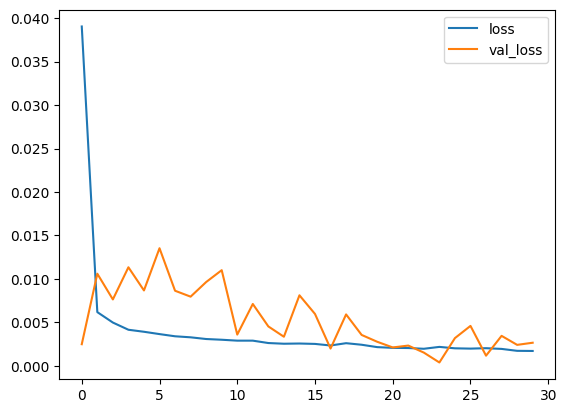

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history["loss"], label='loss')
plt.plot(h.history["val_loss"], label='val_loss')
plt.legend()

# Avaliação de Resultados

In [ ]:
#predição de valores pela rede
predict = model.predict(X_test)

#transformação inversa do normalizador, pra que possamos plotar no gráfico os resultados
predict = scaler.inverse_transform(predict)
real = test_data

predict.shape

2/2 [==============================] - 1s 18ms/step


(38, 1)

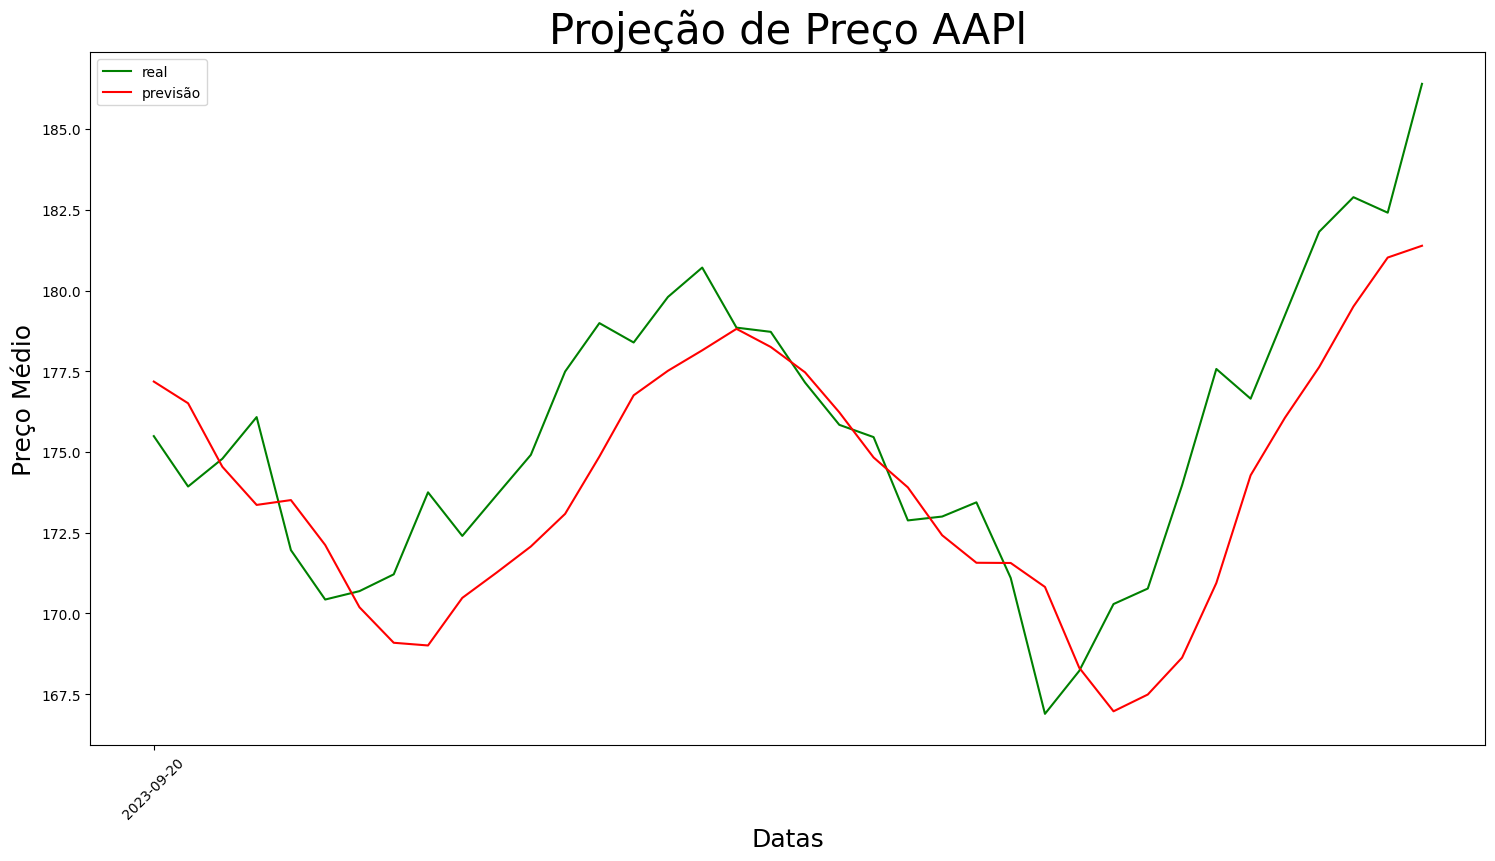

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(real, color = 'green', label = 'real')
plt.plot(predict, color = 'red', label = 'previsão')
plt.xticks(range(0, len(real), 50), df['Date'].iloc[- len(real)::50], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Médio', fontsize=18)
plt.title("Projeção de Preço AAPl", fontsize=30)
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(real, predict)

8.035321720627188

# Experimento 2: Estimando sem informar o conjunto de teste todo

In [ ]:
X_test[0:1]

array([[[0.79842622],
        [0.77893468],
        [0.77627123],
        [0.77409196],
        [0.79431005],
        [0.76997578],
        [0.75932215],
        [0.72820827],
        [0.73414053],
        [0.75048425],
        [0.76731233],
        [0.81440675],
        [0.75702189],
        [0.78401942],
        [0.80314776],
        [0.85072637],
        [0.89346243],
        [0.89612588],
        [0.91537542],
        [0.91828087],
        [0.83607756],
        [0.77130752],
        [0.77881351],
        [0.79309932],
        [0.75605334],
        [0.73075072],
        [0.7492737 ],
        [0.74043581],
        [0.77627123],
        [0.7895885 ]]])

In [ ]:
predicted_days = 30

X_predicted = X_test[0:1].copy() #pega o primeiro dia do conjunto de teste
future_projection = []
for d in range(predicted_days):
    #predição de valores pela rede
    next_t = model.predict(X_predicted)
    future_projection.append(next_t[0, 0])

    #remove primeiro preço da sequência
    temp = np.delete(X_predicted[0], 0)

    #insere último preço da sequência
    temp = np.append(temp, next_t)

    #recoloca no formato tensorflow
    X_predicted[0] = np.reshape(temp, (predicted_days, 1))

future_projection = scaler.inverse_transform(np.array(future_projection).reshape(-1, 1))

future_projection

1/1 [==============================] - 0s 28ms/step


array([[177.18008],
       [177.30211],
       [176.80777],
       [176.00322],
       [175.01509],
       [173.92458],
       [172.79234],
       [171.66531],
       [170.5744 ],
       [169.53825],
       [168.56372],
       [167.64932],
       [166.78926],
       [165.97166],
       [165.18867],
       [164.43098],
       [163.69208],
       [162.96669],
       [162.25063],
       [161.54282],
       [160.84271],
       [160.14871],
       [159.46237],
       [158.78687],
       [158.12408],
       [157.47432],
       [156.83925],
       [156.22104],
       [155.6196 ],
       [155.03667]], dtype=float32)

TESTE U

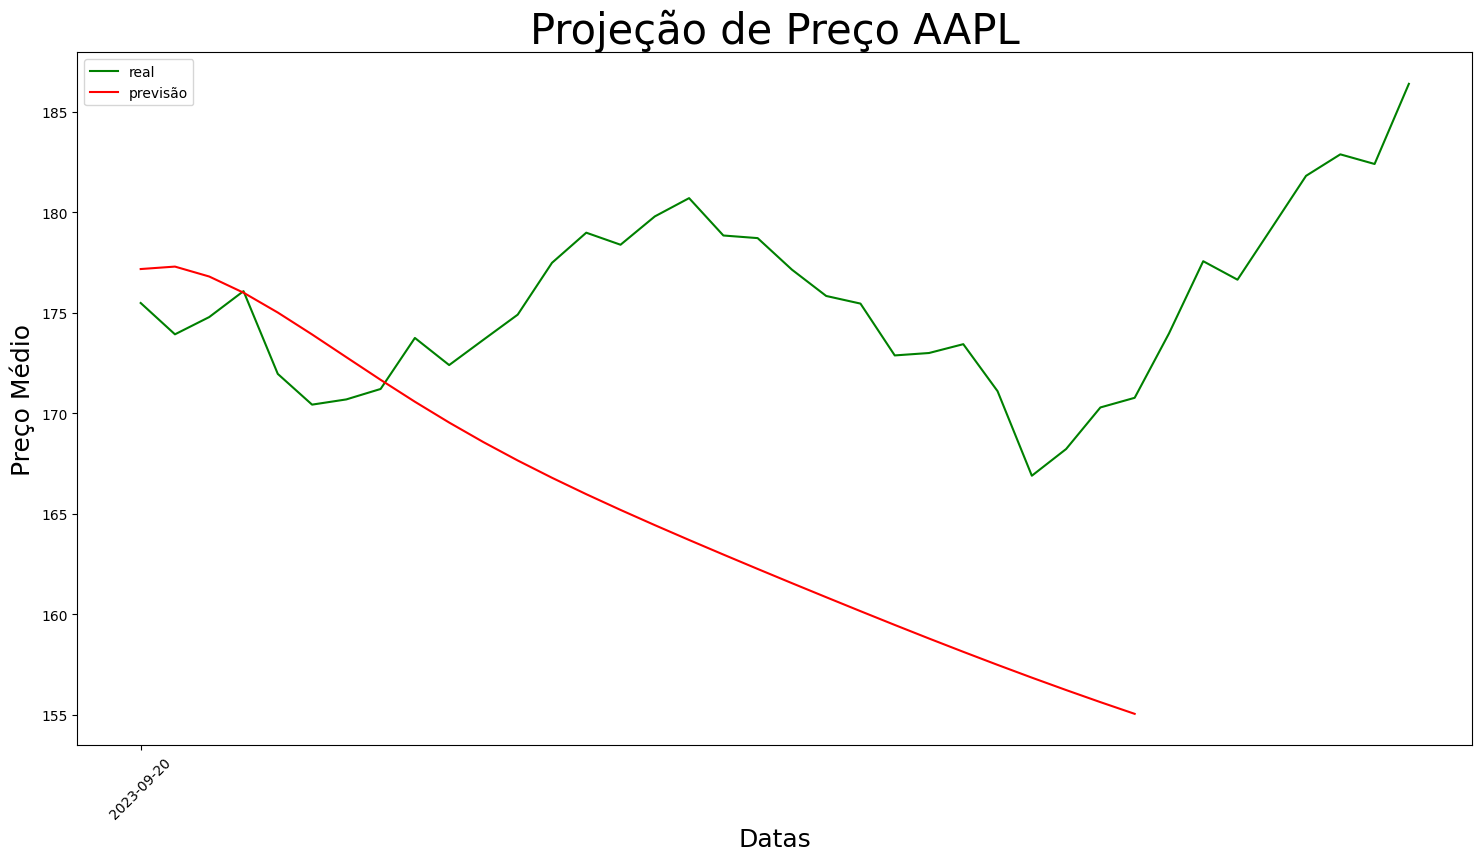

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(real, color = 'green', label = 'real')
plt.plot(future_projection, color = 'red', label = 'previsão')
plt.xticks(range(0, len(real), 50), df['Date'].iloc[- len(real)::50], rotation=45)
plt.xlabel('Datas', fontsize=18)
plt.ylabel('Preço Médio', fontsize=18)
plt.title("Projeção de Preço AAPL", fontsize=30)
plt.legend()
plt.show()

# Referências

* https://www.datacamp.com/community/tutorials/lstm-python-stock-market
* https://www.analyticsvidhya.com/blog/2021/05/stock-price-prediction-and-forecasting-using-stacked-lstm/#:~:text=LSTMs%20are%20widely%20used%20for,the%20information%20that%20is%20not.
* https://www.analyticsvidhya.com/blog/2021/12/stock-price-prediction-using-lstm/
* https://medium.com/alexandre-george-lustosa/previs%C3%A3o-de-pre%C3%A7o-petr4-com-python-lstm-f93722be59e0
* https://finance.yahoo.com/quote/PETR4.SA/history?period1=1356998400&period2=1640995200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
* http://revistagt.fpl.edu.br/get/article/view/1930/1230